# Feature_Scaling-Scaling to quantiles and median Robust Scaling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
# load the the Boston House price data
# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()
# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
# add target
data['MEDV'] = boston_dataset.target
data.head()

In [3]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [6]:
robust=RobustScaler()
robust.fit(X_train)

RobustScaler()

In [9]:
robust.center_


array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21550e+00, 7.94500e+01, 3.21570e+00, 5.00000e+00, 3.11000e+02,
       1.91000e+01, 3.91605e+02, 1.11600e+01])

In [7]:
X_train_scaled=robust.transform(X_train)
X_test_scaled=robust.transform(X_test)

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

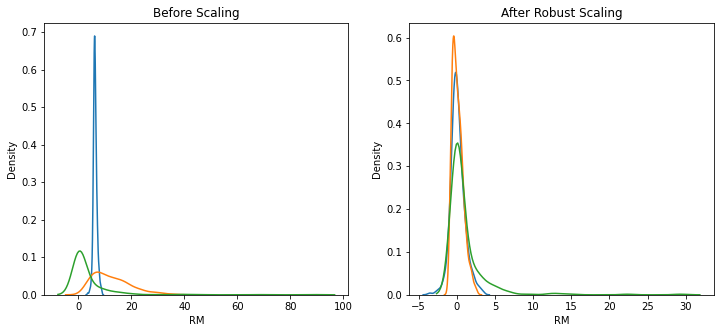

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

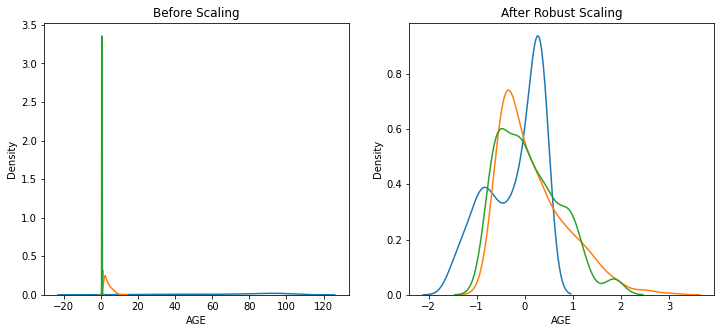

In [11]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()